In [1]:
#Initial setup
import os
import pandas as pd
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#importing data
data = pd.read_excel(r'C:\Users\eleni.apostolopoulou\OneDrive - York St John University\University - updated\Year 3\Data visualisation\Assesment\age_data.xlsx')

In [3]:
data

,Year,Percetnage women first,Percetnage women second,Standardised mean age of mother at childbirth (years)2,Age at first marriage(opposite sex couples),Female participation
0,NaN,NaN,NaN,NaN,30.8,NaN
1,1838.0,NaN,NaN,NaN,NaN,NaN
2,1839.0,NaN,NaN,NaN,NaN,NaN
3,1840.0,NaN,NaN,NaN,NaN,NaN
4,1841.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
179,2016.0,NaN,NaN,30.4,31.5,73.2
180,2017.0,NaN,NaN,30.5,31.7,73.8
181,2018.0,NaN,NaN,30.6,31.8,74.2
182,2019.0,NaN,NaN,30.7,NaN,NaN


In [4]:
#renaming columns for readability
data = data.rename(columns={"Percetnage women first": "Student percetnage first degree -Female", "Percetnage women second": "Student percetnage higher degree -Female","Standardised mean age of mother at childbirth (years)2": "Standardised mean age of mother at childbirth","Female participation":"Female participation in the workforce"})

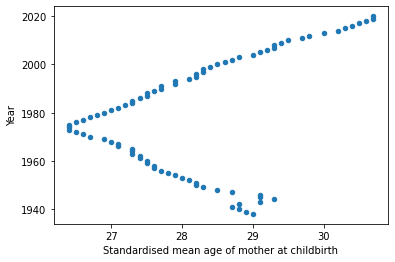

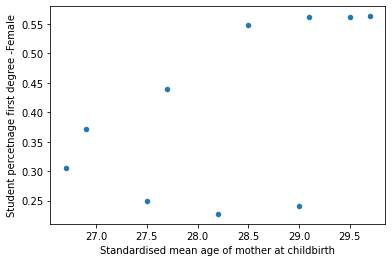

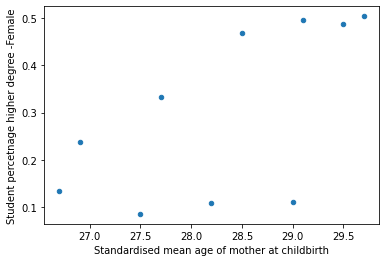

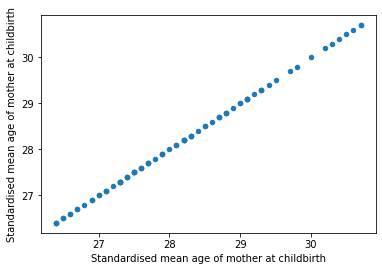

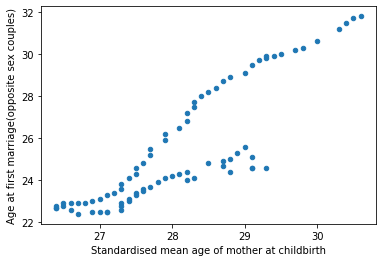

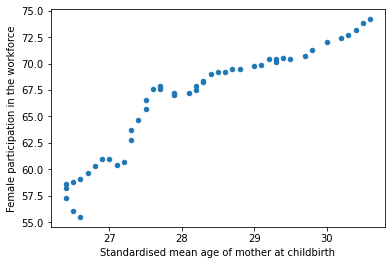

In [5]:
#Checkingthe data for linear relationships
for field in data.columns:
    
    data.plot.scatter(x='Standardised mean age of mother at childbirth', y=field)

In [43]:
data.corr(method="spearman")

,Year,Student percetnage first degree -Female,Student percetnage higher degree -Female,Standardised mean age of mother at childbirth,Age at first marriage(opposite sex couples),Female participation in the workforce
Year,1.000000,0.888112,0.748252,0.358505,0.197424,0.993431
Student percetnage first degree -Female,0.888112,1.000000,0.923077,0.612121,0.605955,1.000000
Student percetnage higher degree -Female,0.748252,0.923077,1.000000,0.672727,0.749563,0.942857
Standardised mean age of mother at childbirth,0.358505,0.612121,0.672727,1.000000,0.902506,0.990306
Age at first marriage(opposite sex couples),0.197424,0.605955,0.749563,0.902506,1.000000,0.990714
Female participation in the workforce,0.993431,1.000000,0.942857,0.990306,0.990714,1.000000


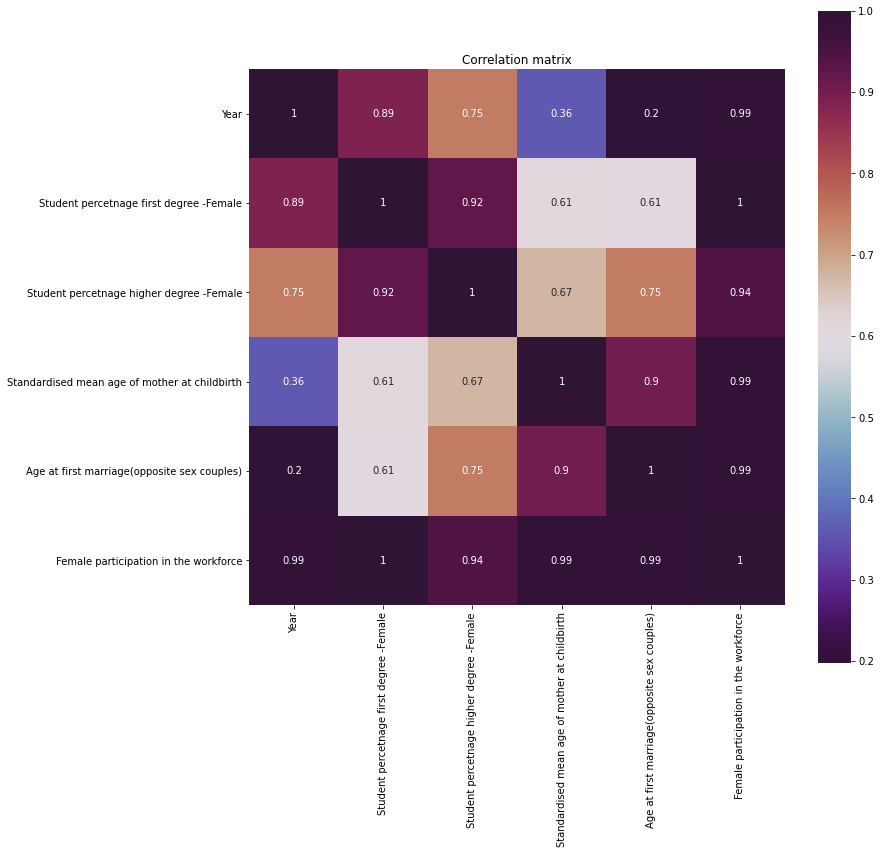

In [6]:
corr_matrix = data.corr(method="spearman")
plt.figure(figsize=(12,12))
plt.title('Correlation matrix')
sns.heatmap(corr_matrix,square=True,annot=True,cmap= 'twilight_shifted')
plt.savefig('Correlation Matrix .png') 

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

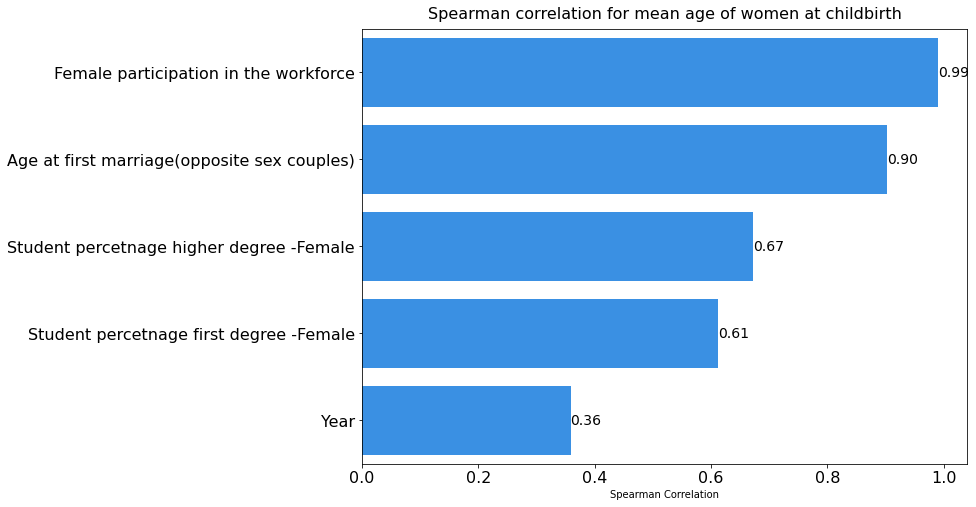

In [10]:
corr = data.corr(method="spearman")['Standardised mean age of mother at childbirth'].drop('Standardised mean age of mother at childbirth')
attributes = data.drop('Standardised mean age of mother at childbirth',axis = 1).columns


features = pd.DataFrame({"Spearman Corr":corr,
                  "Feature":attributes})
features_sorted_desc= features.sort_values('Spearman Corr',ascending=False)
fig = plt.figure()
plt.figure(figsize = (14,8))
plt.subplots_adjust(left=0.3)
#plt.barh('Feature','Pearson Corr',data = features_sorted_desc)
t=sns.barplot(data=features_sorted_desc, x='Spearman Corr', y='Feature', color = 'dodgerblue' )
plt.bar_label(t.containers[0], fmt='%.2f',fontsize=14)

plt.title('')
plt.ylabel('')
plt.xlabel('Spearman Correlation')
plt.title('Spearman correlation for mean age of women at childbirth', y =1.01, size = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)



#plt.savefig('Spearman Correlation .png') 